In [1]:
import sys

sys.path.append('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, RocCurveDisplay, mean_squared_error

from src.data.data_transformer import DataTransformer

In [3]:
train = pd.read_parquet('../data/raw/train_dataset_hackaton2023_train.gzip')

In [4]:
train = DataTransformer(is_train=True).fit_transform(
    X=train
)

### Задача классификация

In [5]:
X_buy_post, y_buy_post = train.drop(['buy_post', 'startdatetime', 'customer_id', 'date_diff_post'], axis=1), train['buy_post']

In [6]:
X_buy_post

,MaxMinDelta,MeanOrderPrice,FavoriteDish,FavoriteHour,MostVisitedFormat
0,57,230.39,9,9,1
34,51,283.00,29,9,0
149,50,493.40,2,15,2
248,27,144.48,50,21,3
455,15,558.94,43,11,2
...,...,...,...,...,...
24261871,1,389.05,5,11,2
24261882,0,603.78,2,15,4
24261928,0,412.70,156,21,2
24261958,0,454.97,465,12,1


In [7]:
X_train_buy_post, X_test_buy_post, y_train_buy_post, y_test_buy_post = train_test_split(
    X_buy_post, y_buy_post,
    test_size=0.33,
    shuffle=True,
    random_state=55
)

In [8]:
forest_classifier = RandomForestClassifier(n_estimators=1000, max_depth=20, class_weight='balanced', random_state=21)

In [9]:
forest_classifier.fit(
    X=X_train_buy_post,
    y=y_train_buy_post
)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=1000,
                       random_state=21)

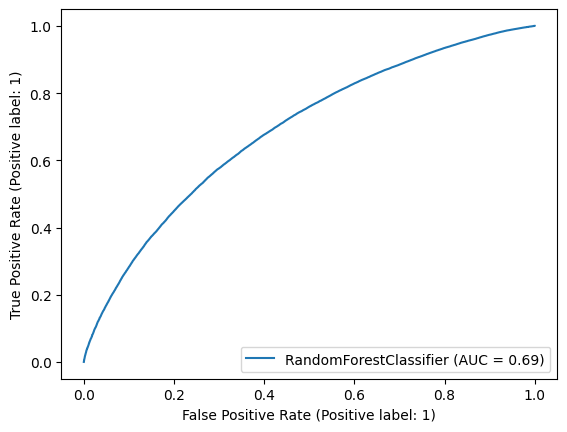

In [10]:
RocCurveDisplay.from_estimator(
    estimator=forest_classifier,
    X=X_test_buy_post,
    y=y_test_buy_post
)

In [11]:
f1_score(
    y_pred=forest_classifier.predict(X_test_buy_post),
    y_true=y_test_buy_post
)

0.7805903919956141

In [23]:
f1_cv = cross_val_score(
    estimator=forest_classifier,
    X=X_buy_post,
    y=y_buy_post,
    scoring='f1',
    cv=3
)

f1_cv

array([0.79341179, 0.78480703, 0.75871528])

In [12]:
forest_classifier.feature_importances_

array([0.36313701, 0.29644809, 0.15880736, 0.11088437, 0.07072317])

### Сохранение модели

In [13]:
import pickle

filename = "../model/less_features_random_forest_classifier.pickle"

pickle.dump(forest_classifier, open(filename, "wb"))

### Задача регрессии

In [14]:
X_diff_post, y_diff_post = train.drop(['buy_post', 'startdatetime', 'customer_id', 'date_diff_post'], axis=1), train['date_diff_post']

In [15]:
X_diff_post

,MaxMinDelta,MeanOrderPrice,FavoriteDish,FavoriteHour,MostVisitedFormat
0,57,230.39,9,9,1
34,51,283.00,29,9,0
149,50,493.40,2,15,2
248,27,144.48,50,21,3
455,15,558.94,43,11,2
...,...,...,...,...,...
24261871,1,389.05,5,11,2
24261882,0,603.78,2,15,4
24261928,0,412.70,156,21,2
24261958,0,454.97,465,12,1


In [16]:
X_train_diff_post, X_test_diff_post, y_train_diff_post, y_test_diff_post = train_test_split(
    X_diff_post, y_diff_post,
    test_size=0.33,
    shuffle=True,
    random_state=66
)

In [17]:
forest_regressor = RandomForestRegressor(criterion='friedman_mse', n_estimators=1000, max_depth=20, random_state=55)

In [18]:
forest_regressor.fit(
    X=X_train_diff_post,
    y=y_train_diff_post
)

RandomForestRegressor(criterion='friedman_mse', max_depth=20, n_estimators=1000,
                      random_state=55)

In [19]:
mse = mean_squared_error(
    y_pred=forest_regressor.predict(X_test_diff_post),
    y_true=y_test_diff_post
)

mse

289.20567116991003

In [20]:
rmse = mse ** 0.5

rmse

17.0060480761966

In [21]:
forest_regressor.feature_importances_

array([0.17847603, 0.4033223 , 0.1997328 , 0.13469637, 0.0837725 ])

In [22]:
import pickle

filename = "../model/less_features_random_forest_regressor.pickle"

pickle.dump(forest_regressor, open(filename, "wb"))